# Case-Firm-Credit

The following exercises require the attached dataset "EM.csv", which is a sample of the credit status and characteristics of the firms in the UK in 2019 and 2020.

Load necessary libraries

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore') 

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# This is important to show seaborn figures in Jupyter Notebook
%matplotlib inline 

## Loading datasets

In [27]:

import pandas as pd
data_all= pd.read_csv("EM.csv")

data_all.head()

,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


## EDA

Show the summary statistics

In [28]:
data_all.describe()

,Creditscore,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
count,8176.000000,8107.000000,6.771000e+03,7740.000000,2981.000000,6773.000000,2443.000000,5456.000000,2913.000000,6601.000000,...,3.854000e+03,7.707000e+03,2020.000000,5075.000000,1676.000000,4552.000000,3018.000000,6724.000000,1385.000000,3075.000000
mean,57.300514,5.222030,5.292997e+05,60.431912,27.903380,22.988502,65.895390,51.214527,51.135009,38.020029,...,8.513789e+03,1.070198e+04,-536.391740,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356
std,29.730987,4.402007,2.983264e+06,29.744458,122.359699,105.484711,160.958270,142.652371,159.209969,141.429108,...,1.267379e+05,1.020021e+05,5486.814104,4972.515365,33.273956,30.629930,9.685434,7.609185,28.776699,28.611943
min,15.000000,0.900000,5.000000e+02,12.000000,-986.769231,-912.765957,-986.769231,-962.567310,-986.769231,-982.024945,...,-6.370710e+05,-6.797920e+05,-138300.000000,-170400.000000,-92.670157,-96.103896,0.000210,0.000002,0.000089,0.000056
25%,29.000000,0.900000,5.000000e+02,31.000000,0.258019,0.058547,5.022592,4.357923,1.600826,1.272559,...,5.350000e-01,8.805000e-01,-111.152750,-180.526000,18.999768,18.746543,0.978612,0.918068,10.216751,11.334873
50%,45.000000,4.500000,1.543000e+04,57.000000,8.895044,6.909952,25.345375,19.642117,18.210079,14.065986,...,1.298550e+01,8.379200e+01,-6.967000,-17.631000,35.722637,32.407668,1.536642,1.411439,29.856705,31.473657
75%,90.000000,10.600000,2.342970e+05,92.000000,44.012601,24.904707,95.714174,64.367905,82.183945,51.639653,...,8.594805e+02,3.791737e+03,-0.626750,-0.558500,73.842839,59.381827,3.223637,2.763619,56.823166,59.481722
max,99.000000,19.400000,5.000000e+07,99.000000,815.362798,977.934426,991.539401,996.705178,991.539401,990.810811,...,4.838900e+06,4.862100e+06,15584.000000,36666.000000,100.000000,100.000000,97.166667,99.593883,100.000000,100.000000


In [29]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

### Show the histogram of 'Creditscore' grouped by 'Creditscoreindicator'

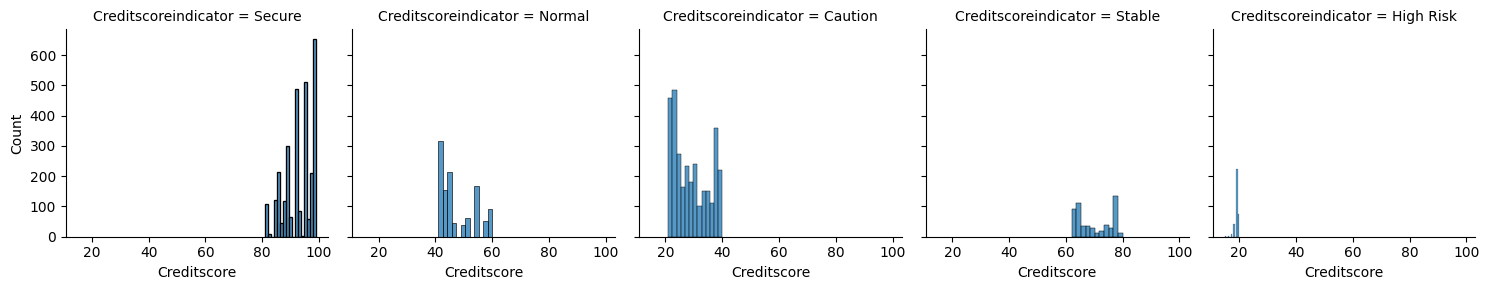

In [30]:
chart = sns.FacetGrid(data_all, col='Creditscoreindicator')  
chart.map(sns.histplot, 'Creditscore') 

### Show the scatter plots between 'Creditscore' (Y) and 'ReturnonCapitalEmployed2020' (X) grouped by 'SMEindicator'

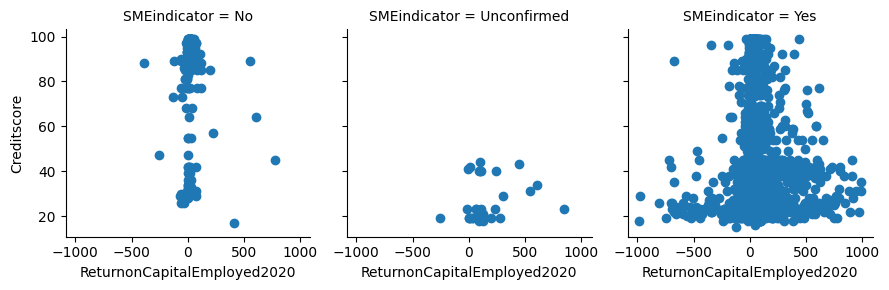

In [31]:

chart = sns.FacetGrid(data_all, col='SMEindicator')  
chart.map(plt.scatter, 'ReturnonCapitalEmployed2020', 'Creditscore')  


## Classification with multiple labels

### Data Preprocessing 

Make data preprocessing: taking the 'Creditscoreindicator' as the target variable 'Y'; keeping remaining numerical data (except ‘Creditscore’) as 'X'; filling missing values by feature means; using 20% of data as the test set and '101' as the random state; doing StandardScaler to X. 

In [32]:
data=data_all.drop(columns=['Creditscore', 'SMEindicator']) 
target = data.pop('Creditscoreindicator')
data=data.fillna(data.mean())

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=0.2, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### AdaBoost

Use Ada Boost Classification (with 3 estimators and a random state of 101) to fit the data. Use the test set to obtain a classification report. 

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
hypothesis = AdaBoostClassifier(n_estimators=3, random_state=101)
hypothesis.fit(X_train, Y_train)
Y_pred = hypothesis.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

     Caution       0.87      0.81      0.84       623
   High Risk       0.00      0.00      0.00        75
      Normal       0.48      1.00      0.65       221
      Secure       1.00      0.97      0.99       612
      Stable       0.67      0.02      0.04       105

    accuracy                           0.81      1636
   macro avg       0.60      0.56      0.50      1636
weighted avg       0.81      0.81      0.78      1636



### Feature importance

In [36]:
feature_names=data.columns

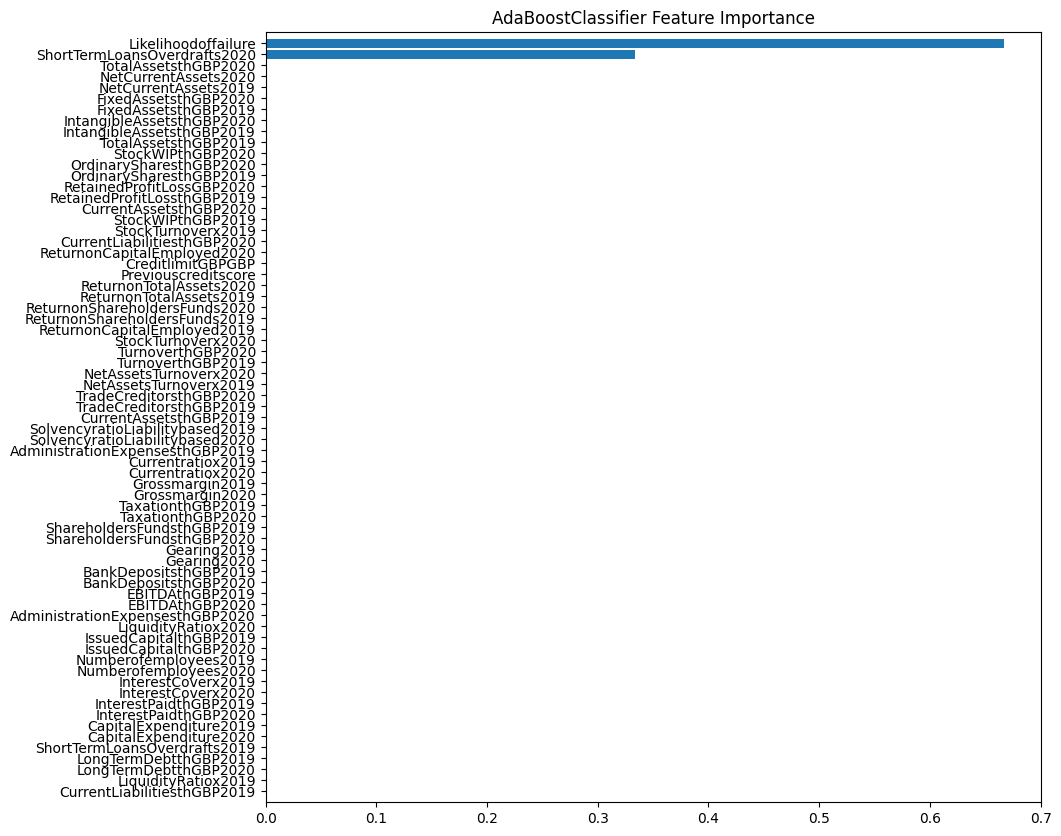

In [37]:
importance = hypothesis.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure(figsize=(10, 10))
plt.title("AdaBoostClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()